In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
import joblib
import os


### Importing the breast cancer dataset


In [7]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###   Checking the null values
No missing values found

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Removing Unnecessary columns

In [10]:
df.drop(['id'], axis = 1, inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# Renaming the diagnosis column
df['diagnosis'] = df['diagnosis']. replace({'M': 'Malignant', 'B':'Benign'})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Checking for potential outliers

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


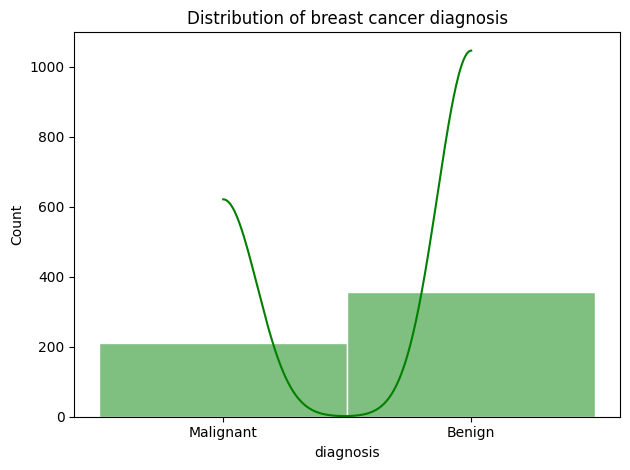

In [16]:
sns.histplot(df, x= 'diagnosis', kde=True, color = 'green', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

### Checking for the distribution of the data

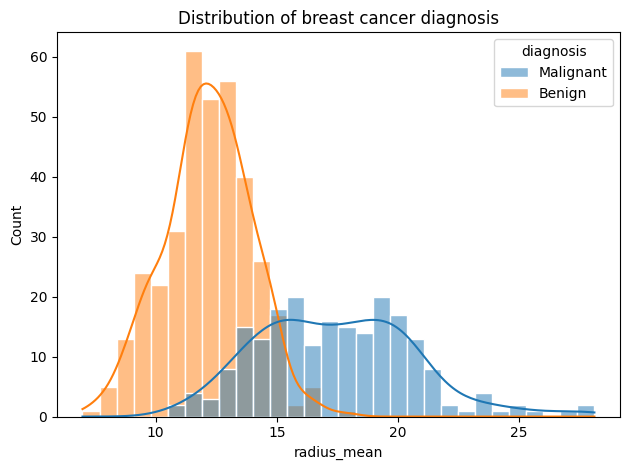

In [25]:
sns.histplot(df,  x = 'radius_mean', bins = 30, kde = True, hue ='diagnosis', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

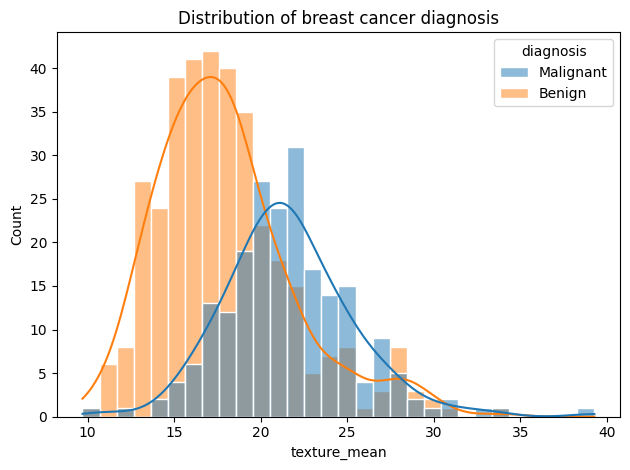

In [26]:
sns.histplot(df,  x = 'texture_mean', bins = 30, kde = True, hue ='diagnosis', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

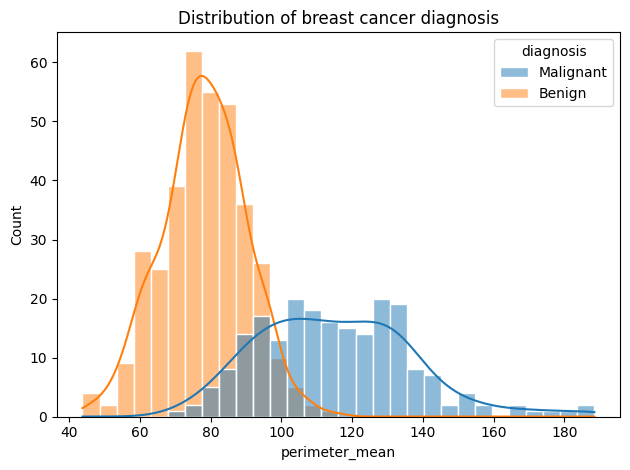

In [27]:
sns.histplot(df,  x = 'perimeter_mean', bins = 30, kde = True, hue ='diagnosis', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

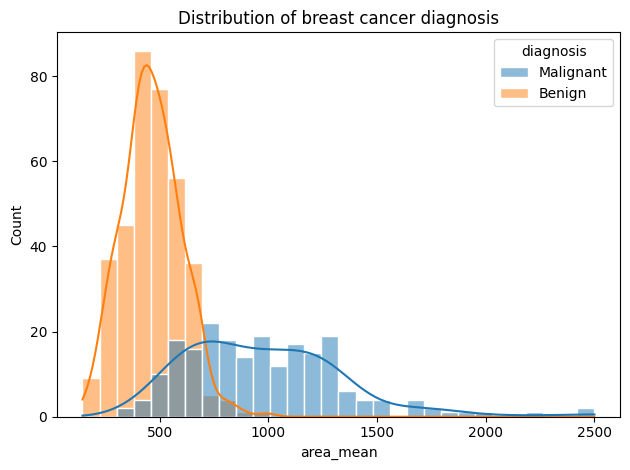

In [28]:
sns.histplot(df,  x = 'area_mean', bins = 30, kde = True, hue ='diagnosis', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

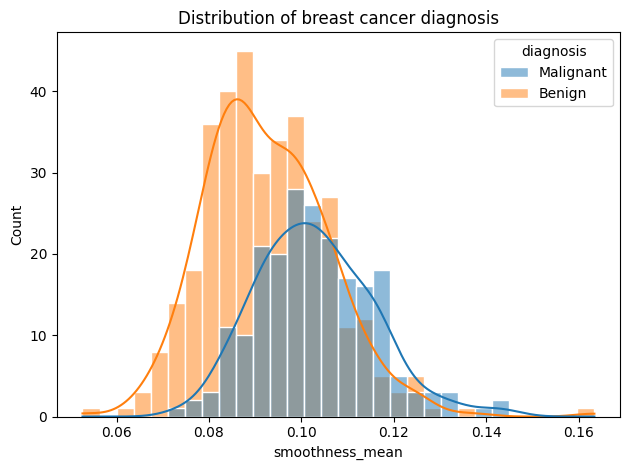

In [29]:
sns.histplot(df,  x = 'smoothness_mean', bins = 30, kde = True, hue ='diagnosis', edgecolor = 'white')
plt.title('Distribution of breast cancer diagnosis')
plt.tight_layout()
plt.show()

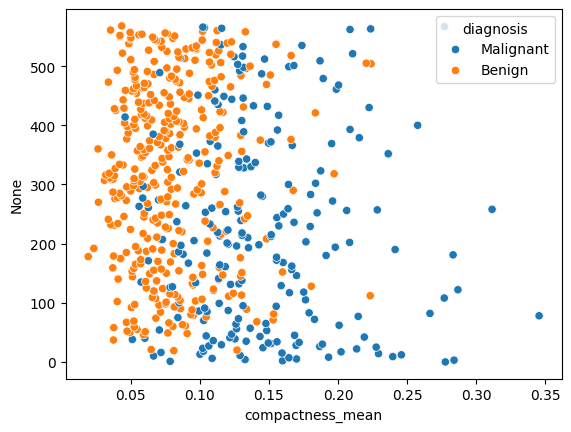

In [44]:
sns.scatterplot(data = df, x='compactness_mean', y = df.index, hue ='diagnosis')
plt.show()

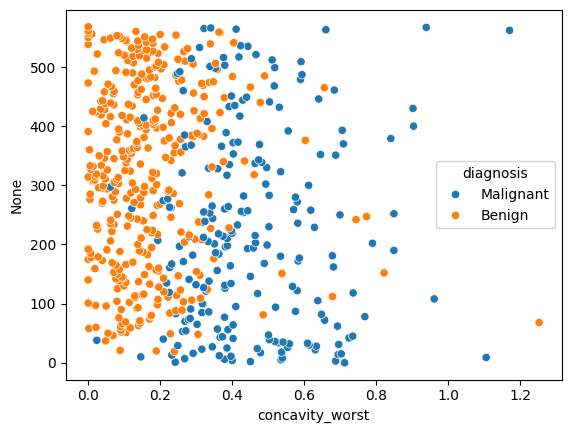

In [45]:
sns.scatterplot(data = df, x='concavity_worst', y = df.index, hue ='diagnosis')
plt.show()

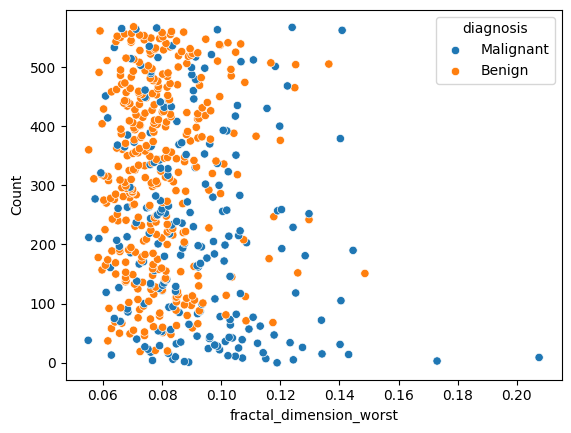

In [48]:
sns.scatterplot(data = df, x='fractal_dimension_worst', y = df.index, hue ='diagnosis')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

Using One-Hot Encoding

One Hot Encoding is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.

In [50]:
df_corr = pd.get_dummies(df,columns = ['diagnosis'], dtype = int)
df_corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_Benign,diagnosis_Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


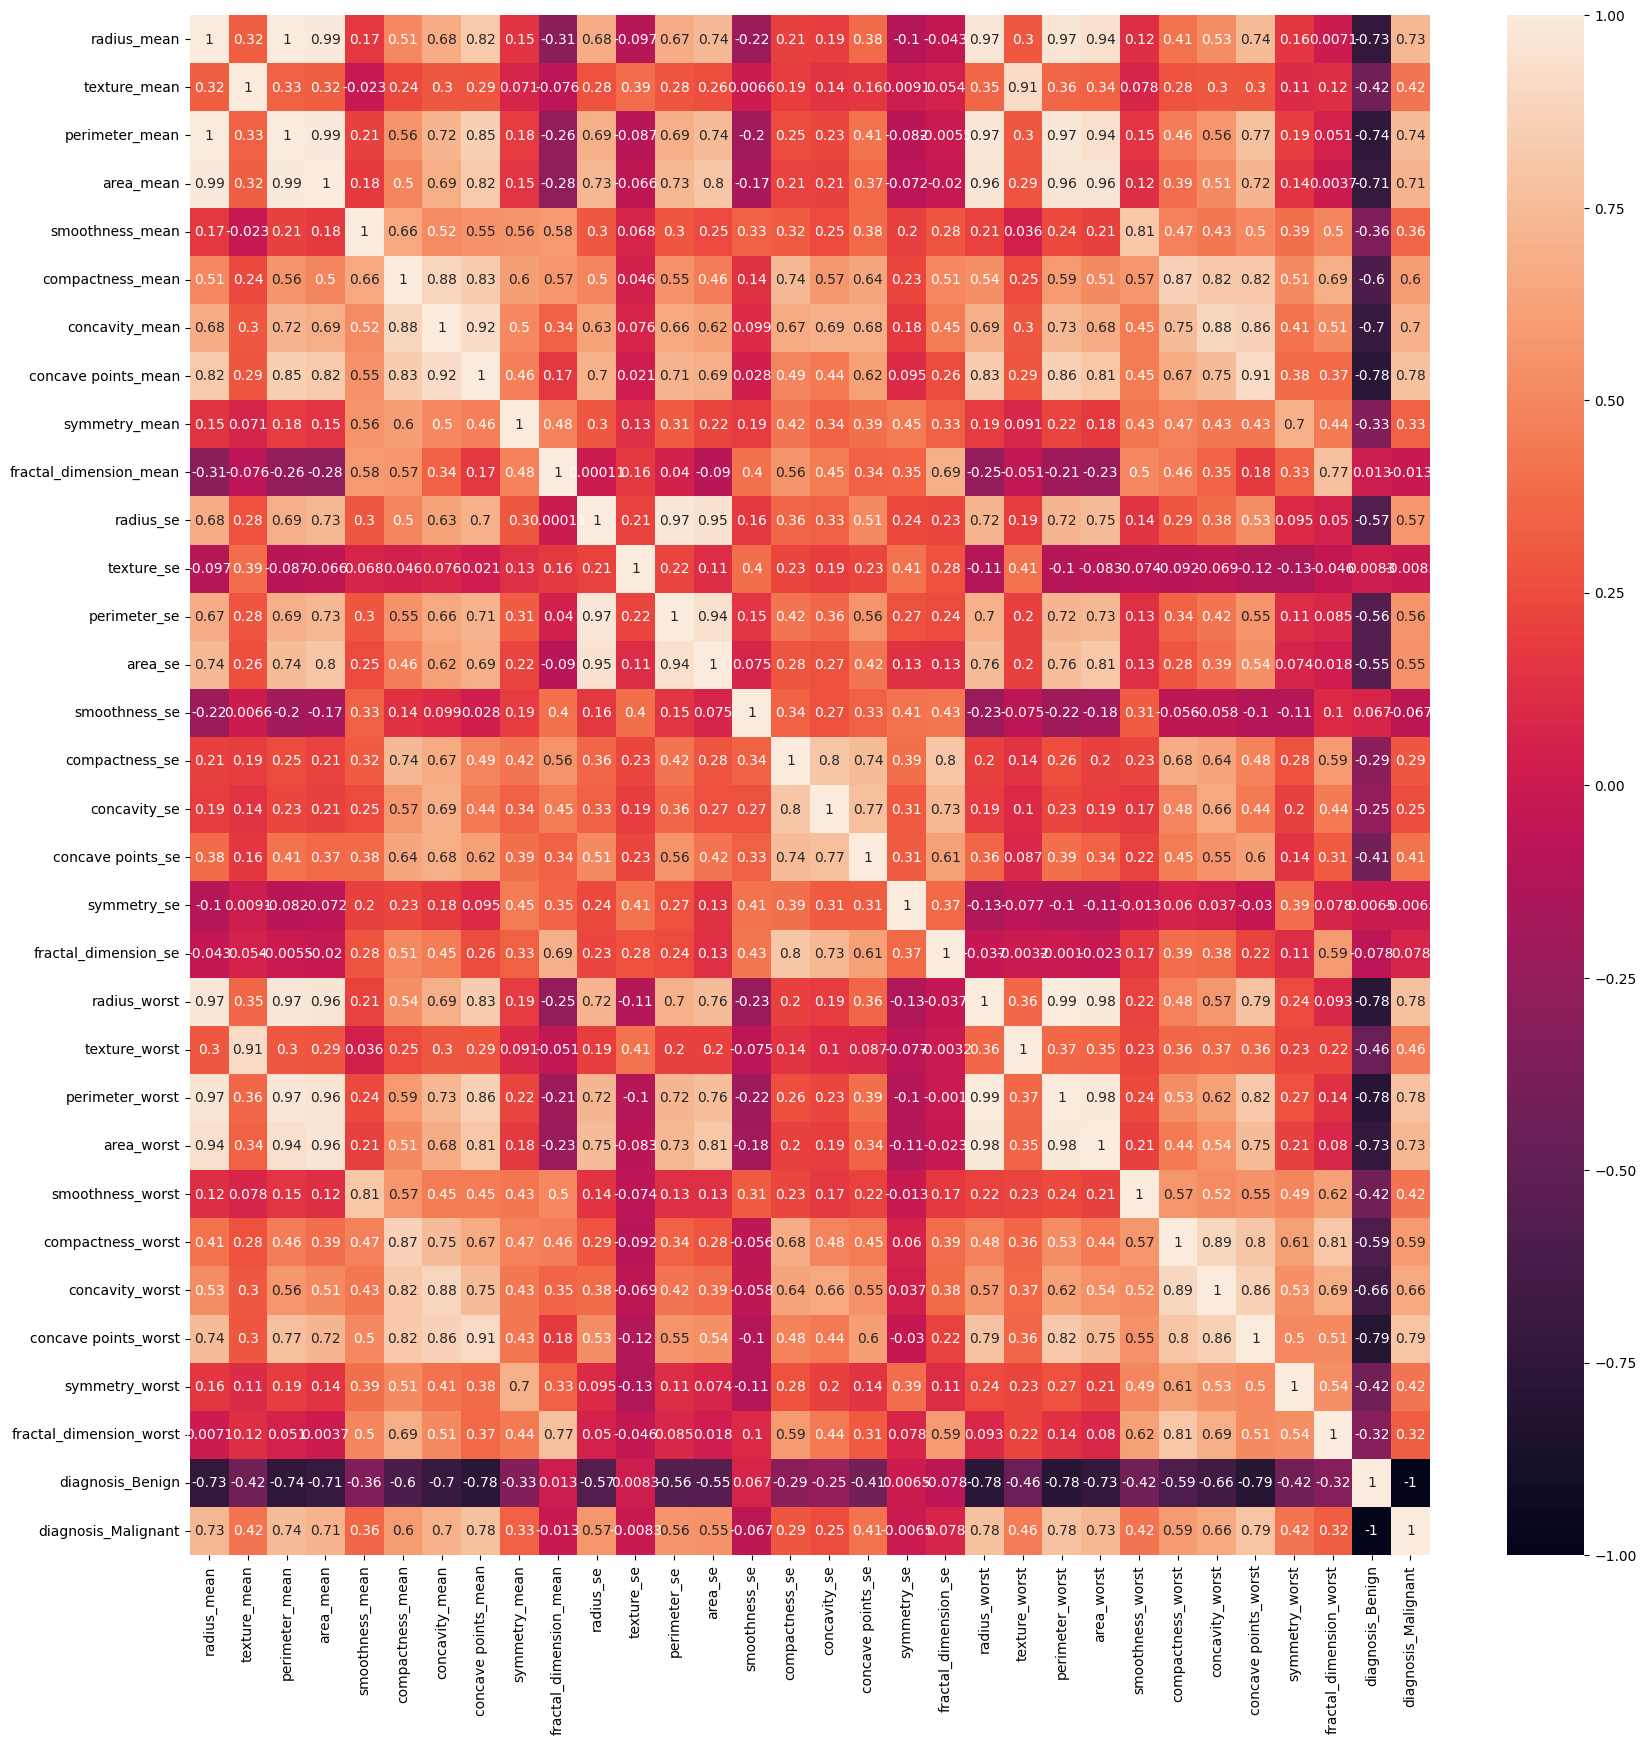

In [51]:
corr = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap = 'rocket', annot = True)
plt.show()

## Obtaining the highest correlated features

In [53]:
# Get the highest correlation for Benign
corr_benign = corr['diagnosis_Benign'].drop(["diagnosis_Benign", "diagnosis_Malignant"]).abs()
highest_corr_benign = corr_benign.idxmax()
highest_value_benign = corr_benign.max()

print(f"Highest correlated feature for benign: {highest_corr_benign} ({highest_value_benign:.4f})")

Highest correlated feature for benign: concave points_worst (0.7936)


In [57]:
# Get the highest correlation for Malignant
corr_malignant = corr["diagnosis_Malignant"].drop(["diagnosis_Benign", "diagnosis_Malignant"]).abs()
highest_corr_malignant = corr_malignant.idxmax()
highest_value_malignant = corr_malignant.max()

print(f"Highest correlated feature for malignant: {highest_corr_malignant} ({highest_value_malignant:.4f})")

Highest correlated feature for malignant: concave points_worst (0.7936)


In [59]:
print(corr[["diagnosis_Benign", "diagnosis_Malignant"]].loc[highest_corr_benign])

diagnosis_Benign      -0.793566
diagnosis_Malignant    0.793566
Name: concave points_worst, dtype: float64


### Splitting the data using Train Test Split

In [63]:
X = df_corr.drop(["diagnosis_Benign", "diagnosis_Malignant"], axis=1).values
y = df_corr["diagnosis_Malignant"].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Sampling
In machine learning, data sampling refers to techniques used to adjust the class distribution within a dataset. This becomes crucial when handling imbalanced datasets, such as in breast cancer detection, where one class (e.g., benign tumors) significantly outnumbers the other (e.g., malignant tumors).

Such imbalance can lead models to become biased toward the majority class, resulting in poor detection of malignant cases — which are clinically more critical.

In [65]:
# Intializing our data sampling algorithm
smt = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smt.fit_resample(X_train, y_train)

In [67]:
# Standard Scaler to scale the dataset.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

### Model Implementation
Logistic Regression

In [68]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_bal)

LogisticRegression()

# Classification Report Metrics
A classification report is needed to evaluate the performance of a classification model. It provides key metrics like precision, recall, F1-score, and support, helping us understand how well the model distinguishes between classes. This is crucial for identifying imbalances, improving predictions, and making informed decisions based on model performance.

Precision (also called positive predictive value) is how many of the predicted positive instances are actually correct. It is useful when false positives are costly

Written as a formula:
Precision = True Positives / True Positives + False Positives

Recall (also known as sensitivity) is how many actual positive instances were correctly identified. It is important when false negatives need to be minimized

Written as a formula:
Recall (Sensitivity) = True Positives / True Positives + False Negatives

F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 Score = 2 * Precision * Recall / Precision + Recall



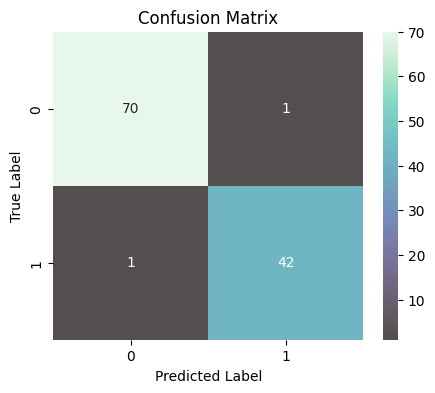

In [71]:
model_scores = {}

y_pred = model.predict(X_test_scaled)

cm_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_matrix, cmap="mako", alpha=0.7, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [73]:
# Store in dict
model_scores = {}

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

model_scores["Logistic Regression"] = {
    "model": model,
    "y_pred": y_pred,
    "accuracy": acc,
    "report": report,
    "confusion_matrix": cm
}
# print classification 

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Applying more models to our model training process

In [82]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes Gaussian": GaussianNB(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

## Overview of Classification Models Used

1. Random Forest
Purpose: An ensemble of decision trees that combines multiple trees trained on random subsets of the data and features.

How It Works:

Each tree votes for a class.
The majority vote is taken as the final prediction.
Strengths: Handles high-dimensional data well, reduces overfitting through averaging.

2. XGBoost (Extreme Gradient Boosting)
Purpose: A powerful gradient boosting algorithm that builds trees sequentially to correct the errors of previous trees.

Core Idea:

Uses gradient descent to minimize a loss function.
Regularization is built in to prevent overfitting.

3. Decision Tree
Purpose: A tree-like structure where each internal node represents a decision rule, and each leaf node represents a class label.

How It Works:

Splits data based on feature thresholds to maximize information gain or reduce Gini impurity.

4. Naive Bayes (Gaussian)
Purpose: A probabilistic model based on Bayes' Theorem with the assumption of feature independence.

5. K-Nearest Neighbors (KNN)¶
Purpose: A non-parametric algorithm that classifies a sample based on the majority label among its 
(k) nearest neighbors.

In [83]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    model_scores[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": acc,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("=======================================================")
    print("\n")


--- Random Forest ---
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



--- XGBoost ---
Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



--- Decision Tree ---
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[67  4]
 [ 2 41]]
Classification Report:
           

### Plotting different models performance

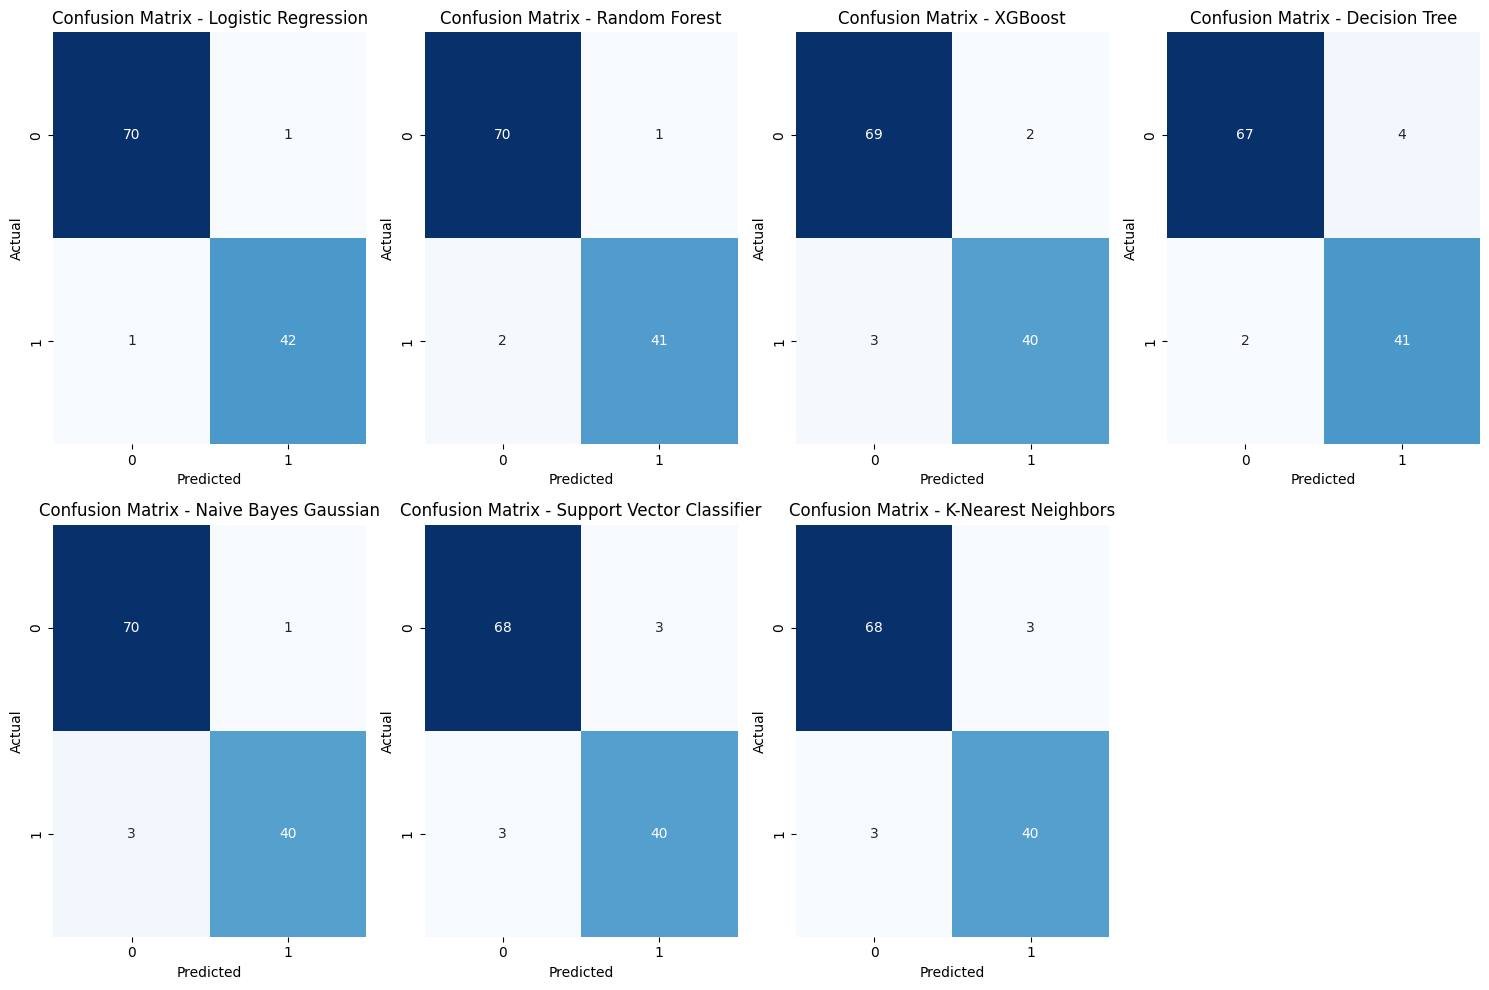

In [84]:
num_models = len(model_scores)
cols = 4
rows = -(-num_models // cols)  # ceiling division without importing math module

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, (name, info) in enumerate(model_scores.items()):
    sns.heatmap(info["confusion_matrix"], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Turn off any unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Bar Plot (Accuracy, Precision, Recall, F1-Score

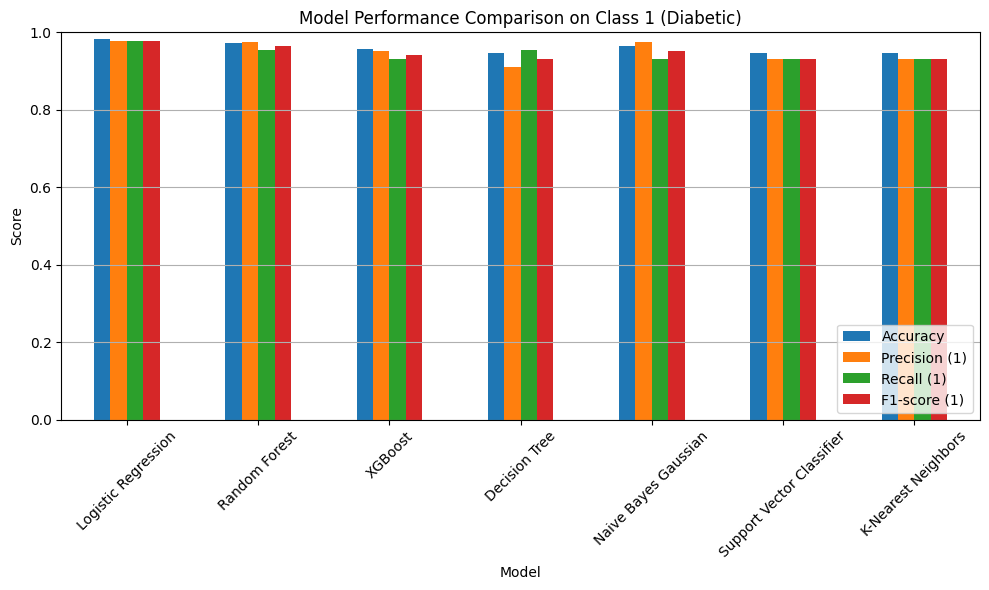

In [85]:
plot_data = [
    {
        "Model": name,
        "Accuracy": info["accuracy"],
        "Precision (1)": info["report"]["1"]["precision"],
        "Recall (1)": info["report"]["1"]["recall"],
        "F1-score (1)": info["report"]["1"]["f1-score"]
    }
    for name, info in model_scores.items()
]

scores_df = pd.DataFrame(plot_data)
ax = scores_df.set_index("Model")[["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"]].plot(
    kind='bar', figsize=(10, 6)
)

plt.title("Model Performance Comparison on Class 1 (Diabetic)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusion
Breast Cancer Classification with Balanced Sampling and Supervised Models:
In this project, we successfully developed a breast cancer classification pipeline using multiple supervised learning models, enhanced with data balancing and feature scaling techniques. The primary goal was to accurately distinguish between malignant and benign tumors, with special emphasis on improving sensitivity to malignant cases — the minority and clinically critical class.